<a href="https://colab.research.google.com/github/shubham1262/Reco_Engine/blob/main/Reco_System_Using_Collaborative_Filtering_SVD_%26_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Collaborative Filtering:
> Split U-I Ratings matrix into user embeddings and Item embeddings
> Decomposes U-I matrix using: SVD (replace null with 0), ALS (ignore nulls), Wals (doesn't ignore)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import tensorflow as tf

%matplotlib inline  

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Content_type/ratings.csv')

In [ ]:
dataframe.head(100)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
95,2,720,4.0,835355978
96,3,60,3.0,1298861675
97,3,110,4.0,1298922049
98,3,247,3.5,1298861637


In [ ]:
df['userId'].nunique()

671

In [ ]:
df.groupby(['rating'])['userId'].count()

rating
0.5     1101
1.0     3326
1.5     1687
2.0     7271
2.5     4449
3.0    20064
3.5    10538
4.0    28750
4.5     7723
5.0    15095
Name: userId, dtype: int64

In [ ]:
df.userId = df.userId.astype('category').cat.codes.values
df.movieId = df.movieId.astype('category').cat.codes.values

In [ ]:
user_item_interaction=pd.pivot_table(df,index='userId',columns='movieId')
user_item_interaction

rating                                               ... timestamp  \
movieId   0    1    2    3    4    5    6    7    8    9     ...      9056   
userId                                                       ...             
0          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN   
1          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  4.0  ...       NaN   
2          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN   
3          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  4.0  ...       NaN   
4          NaN  NaN  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
666        NaN  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN  ...       NaN   
667        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN   
668        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN   
669        4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN   
670        5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN   

                                                      
movieId 9057 9058 9059 9060 9061 9062 9063 9064 9065  
userId                                                
0        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  
666      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
667      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
668      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
669      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
670      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[671 rows x 18132 columns]

> SVD gives 3 vectors
> 1. left singular vectors (similarity between user and latent vectors)
> 2. diagonal vector (strength of latent vectors)
> 3. right singular vectors (similarity between item and latent vectors)

#SVD: Singular Value Decomposition

In [ ]:
user_item_interaction.fillna(0, inplace=True)

In [ ]:
user_item_interaction.head(5)

rating                                               ... timestamp  \
movieId   0    1    2    3    4    5    6    7    8    9     ...      9056   
userId                                                       ...             
0          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
1          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  ...       0.0   
2          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
3          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  ...       0.0   
4          0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   

                                                      
movieId 9057 9058 9059 9060 9061 9062 9063 9064 9065  
userId                                                
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 18132 columns]

## Creating keras layers 
> User embeddings

In [ ]:
unique_count=df.nunique()

In [ ]:
unique_count['userId']

671

In [ ]:
user_input=tf.keras.layers.Input(shape=(1,),name='user_input',dtype='int64')
user_embedding=tf.keras.layers.Embedding(unique_count['userId'],32,name='user_embedding')(user_input)
user_vec =tf.keras.layers.Flatten(name='FlattenUsers')(user_embedding)

> Movie embeddings

In [ ]:
movie_input=tf.keras.layers.Input(shape=(1,),name='movie_input',dtype='int64')
movie_embedding=tf.keras.layers.Embedding(unique_count['movieId'],32,name='movie_embedding')(movie_input)
movie_vec =tf.keras.layers.Flatten(name='FlattenMovies')(movie_embedding)

> Dot product

In [ ]:
sim=tf.keras.layers.dot([user_vec,movie_vec],name='Simalarity-Dot-Product',axes=1)
model =tf.keras.models.Model([user_input, movie_input],sim) #sim=dot product to optimize

> Compiling model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4),loss='mse')

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


> Train test split

In [ ]:
x=df.drop(['rating'],axis=1)
x.head(2)

,userId,movieId,timestamp
0,0,30,1260759144
1,0,833,1260759179


In [ ]:
y=df[['rating']]
y.head(2)

,rating
0,2.5
1,3.0


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
History = model.fit([x_train.userId,x_train.movieId],y_train.rating, batch_size=100,
                              epochs =10, validation_data = ([x_test.userId,x_test.movieId],y_test.rating),
                              verbose = 1)

Epoch 1/10
801/801 [==============================] - 5s 5ms/step - loss: 13.6690 - val_loss: 13.7055
Epoch 2/10
801/801 [==============================] - 5s 6ms/step - loss: 13.6614 - val_loss: 13.7002
Epoch 3/10
801/801 [==============================] - 3s 4ms/step - loss: 13.6410 - val_loss: 13.6714
Epoch 4/10
801/801 [==============================] - 3s 4ms/step - loss: 13.5693 - val_loss: 13.5589
Epoch 5/10
801/801 [==============================] - 5s 6ms/step - loss: 13.3613 - val_loss: 13.2664
Epoch 6/10
801/801 [==============================] - 4s 5ms/step - loss: 12.9314 - val_loss: 12.7376
Epoch 7/10
801/801 [==============================] - 4s 4ms/step - loss: 12.2581 - val_loss: 11.9833
Epoch 8/10
801/801 [==============================] - 3s 4ms/step - loss: 11.3739 - val_loss: 11.0507
Epoch 9/10
801/801 [==============================] - 5s 6ms/step - loss: 10.3378 - val_loss: 10.0034
Epoch 10/10
801/801 [==============================] - 3s 4ms/step - loss: 9.2189 

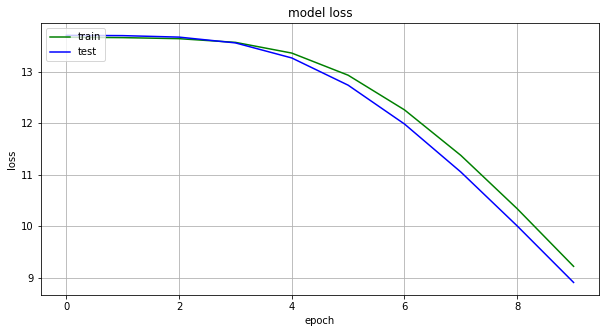

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(History.history['loss'] , 'g')
plt.plot(History.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
sample = {
    'user_input': 2,
    'movie_input':100
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = model.predict(input_dict)
predictions

1/1 [==============================] - 0s 104ms/step


array([[0.88743013]], dtype=float32)

# CF using Neural Network

In [ ]:
nn_inp=tf.keras.layers.Dense(96,activation='relu')(sim)
nn_inp=tf.keras.layers.Dropout(0.4)(nn_inp)
nn_inp=tf.keras.layers.Dense(1,activation='relu')(nn_inp)
nn_model =tf.keras.models.Model([user_input, movie_input],nn_inp)
nn_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 movie_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 32)        21472       ['user_input[0][0]']             
                                                                                                  
 movie_embedding (Embedding)    (None, 1, 32)        290112      ['movie_input[0][0]']            
                                                                                            

In [ ]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-3),loss='mse')

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
History = nn_model.fit([x_train.userId,x_train.movieId],y_train.rating, batch_size=200,
                              epochs =10, validation_data = ([x_test.userId,x_test.movieId],y_test.rating),
                              verbose = 1)

Epoch 1/10
401/401 [==============================] - 4s 7ms/step - loss: 3.8636 - val_loss: 1.0891
Epoch 2/10
401/401 [==============================] - 3s 7ms/step - loss: 1.1293 - val_loss: 0.9704
Epoch 3/10
401/401 [==============================] - 3s 7ms/step - loss: 0.9802 - val_loss: 0.9412
Epoch 4/10
401/401 [==============================] - 2s 5ms/step - loss: 0.8991 - val_loss: 0.9406
Epoch 5/10
401/401 [==============================] - 2s 5ms/step - loss: 0.8384 - val_loss: 0.9358
Epoch 6/10
401/401 [==============================] - 2s 5ms/step - loss: 0.7805 - val_loss: 0.9642
Epoch 7/10
401/401 [==============================] - 2s 5ms/step - loss: 0.7328 - val_loss: 0.9668
Epoch 8/10
401/401 [==============================] - 2s 6ms/step - loss: 0.6758 - val_loss: 0.9730
Epoch 9/10
401/401 [==============================] - 4s 9ms/step - loss: 0.6208 - val_loss: 0.9742
Epoch 10/10
401/401 [==============================] - 4s 9ms/step - loss: 0.5695 - val_loss: 1.0004

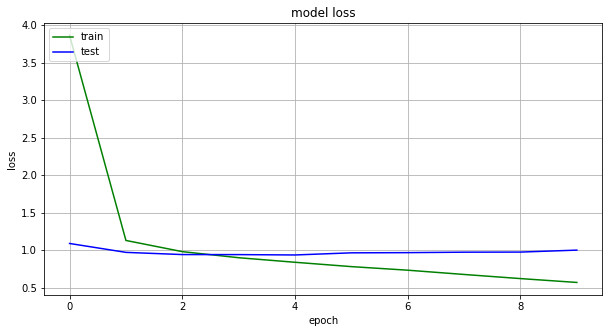

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(History.history['loss'] , 'g')
plt.plot(History.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
sample = {
    'user_input': 2,
    'movie_input':100
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = model.predict(input_dict)
predictions

1/1 [==============================] - 0s 54ms/step


array([[0.61495996]], dtype=float32)